# Stochastic Processes: <br>Data Analysis and Computer Simulation
<br>


# Brownian motion 2: computer simulation
<br>


# 2. Simple Python code to simulate Brownian motion
<br>

# 2.1. Equations to be solved

## Difference equations

\begin{equation}
\mathbf{R}_{i+1}=\mathbf{R}_i+\mathbf{V}_i \Delta t 
\tag{F5}
\end{equation}

$$
\mathbf{V}_{i+1}=
\left(1-\frac{\zeta}{m}\Delta t\right)\mathbf{V}_i + \frac{1}{m} \color{black}{\Delta \mathbf{W}_i} 
\tag{F9}
$$

## Random force

\begin{equation}
\langle \Delta \mathbf{W}_i\rangle=\mathbf{0} 
\tag{F10}
\end{equation}

\begin{equation}
\langle \Delta \mathbf{W}_i\Delta \mathbf{W}_j\rangle = {2k_B T\zeta}\Delta t\mathbf{I}\delta_{ij}  
\tag{F11}
\end{equation}

## Initial condition

$$
\mathbf{R}_0=0,\ \ \ \ \mathbf{V}_0=0\tag{F12}
$$

# 2.2. A simple simulation code

## Import libraries

In [1]:
% matplotlib nbagg
import numpy as np # import numpy library as np
import matplotlib.pyplot as plt # import pyplot library as plt 
from mpl_toolkits.mplot3d import Axes3D # import Axes3D from `mpl_toolkits.mplot3d`
plt.style.use('ggplot') # use "ggplot" style for graphs

## Define parameters and initialize variables

In [2]:
dim  = 3 # system dimension (x,y,z)
nump = 100 # number of independent Brownian particles to simulate 
nums = 1024 # number of simulation steps
dt   = 0.05 # set time increment, \Delta t
zeta = 1.0 # set friction constant, \zeta
m    = 1.0 # set particle mass, m
kBT  = 1.0 # set temperatute, k_B T
std  = np.sqrt(2*kBT*zeta*dt) # calculate std for \Delta W via Eq.(F11)
np.random.seed(0) # initialize random number generator with a seed=0
R = np.zeros([nump,dim]) # array to store current positions and set initial condition Eq.(F12)
V = np.zeros([nump,dim]) # array to store current velocities and set initial condition Eq.(F12)
W = np.zeros([nump,dim]) # array to store current random forcces
Rs = np.zeros([nums,nump,dim]) # array to store positions at all steps
Vs = np.zeros([nums,nump,dim]) # array to store velocities at all steps
Ws = np.zeros([nums,nump,dim]) # array to store random forces at all steps
time = np.zeros([nums]) # an array to store time at all steps

## Perform simulation

In [3]:
for i in range(nums): # repeat the following operations from i=0 to nums-1
    W = std*np.random.randn(nump,dim) # generate an array of random forces accordingly to Eqs.(F10) and (F11)
    R, V = R + V*dt, V*(1-zeta/m*dt)+W/m # update R & V via Eqs.(F5)&(F9)
    Rs[i,:,:]=R # accumulate particle positions at each step in an array Rs
    Vs[i,:,:]=V # accumulate particle velocitys at each step in an array Vs
    Ws[i,:,:]=W # accumulate random forces at each step in an array Ws
    time[i]=i*dt # store time in each step in an array time

# 2.3. Plot trajectories of particles on a 2D plane

- Plot the temporal particle positions $R_x(t),R_y(t),R_z(t)$ in the x-y plane.

<IPython.core.display.Javascript object>


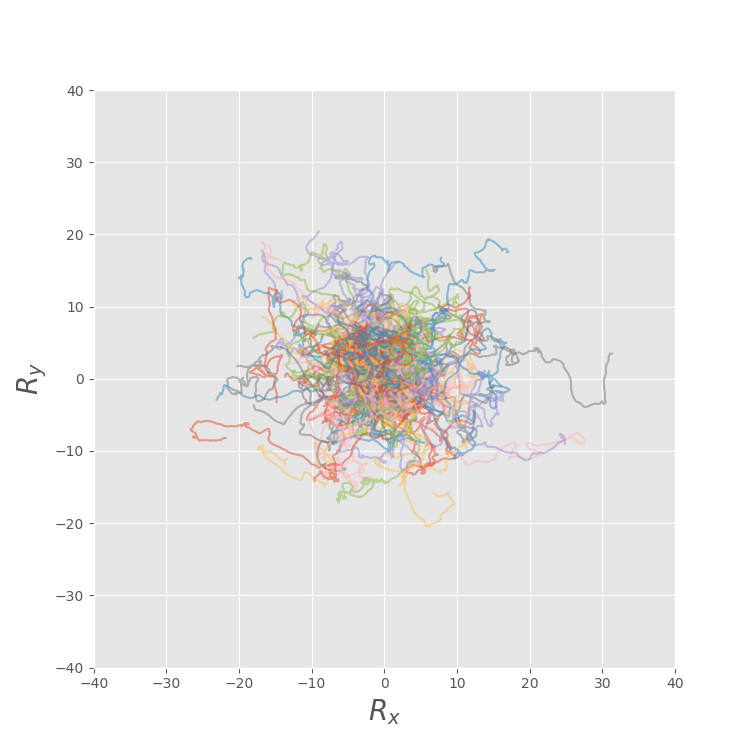

In [7]:
box=80. # set draw area as box^2
fig, ax = plt.subplots(figsize=(7.5,7.5)) # set fig with its size 7.5 x 7.5 inch
ax.set_xlabel(r"$R_x$", fontsize=20) # set x-label
ax.set_ylabel(r"$R_y$", fontsize=20) # set y-label
plt.xlim(-box/2,box/2) # set x-range
plt.ylim(-box/2,box/2) # set y-range
for n in range(nump): # repeat from n=0 to nump-1
    ax.plot(Rs[:,n,0],Rs[:,n,1],alpha=0.5) # plot trajectiries of all particles
plt.show() # draw plots

# 2.4. Plot trajectories of particles in 3D space

- Plot the temporal particle positions $R_x(t),R_y(t),R_z(t)$ in 3D space.

<IPython.core.display.Javascript object>


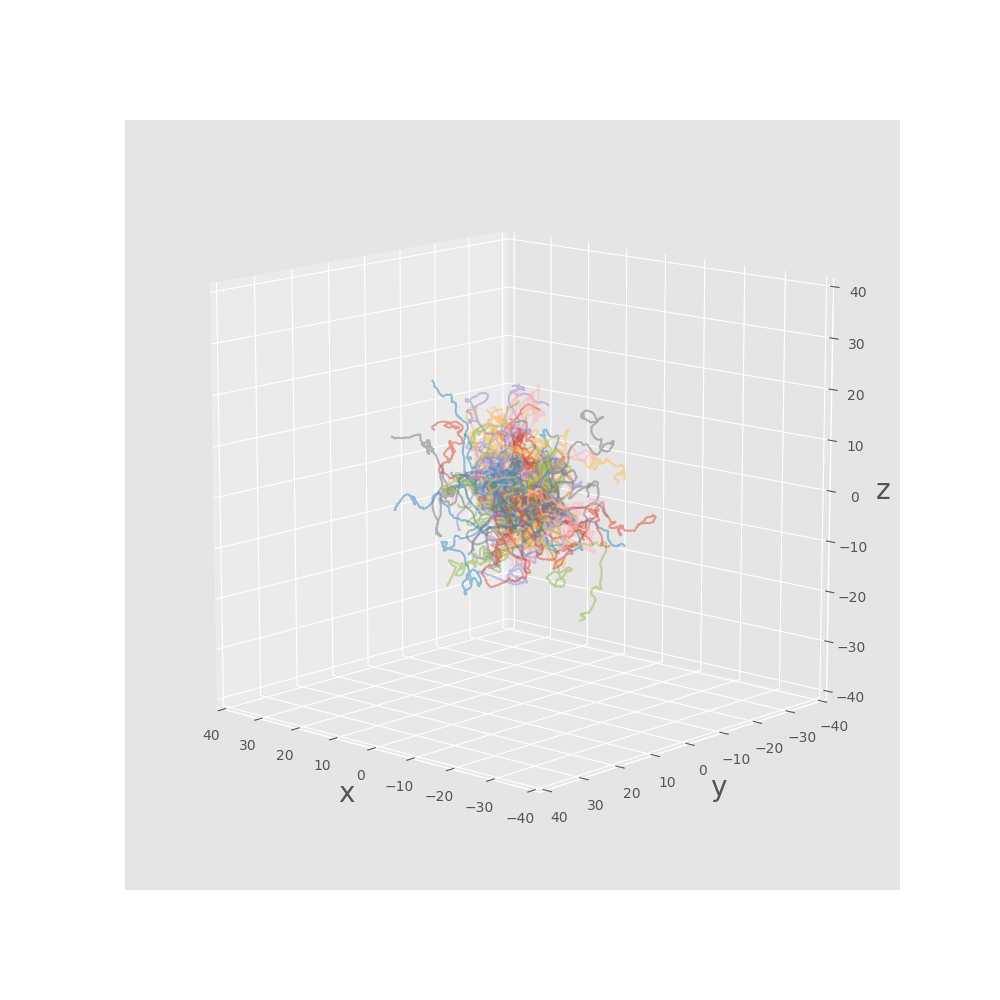

In [5]:
box=80. # set draw area as box^3
fig = plt.figure(figsize=(10,10)) # set fig with its size 10 x 10 inch
ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 2D axes
ax.set_xlim(-box/2,box/2) # set x-range
ax.set_ylim(-box/2,box/2) # set y-range
ax.set_zlim(-box/2,box/2) # set z-range
ax.set_xlabel(r"x",fontsize=20) # set x-label
ax.set_ylabel(r"y",fontsize=20) # set y-label
ax.set_zlabel(r"z",fontsize=20) # set z-label
ax.view_init(elev=12,azim=120) # set view point
for n in range(nump): # repeat from n=0 to nump-1
    ax.plot(Rs[:,n,0],Rs[:,n,1],Rs[:,n,2],alpha=0.5) # plot trajectiries of all particle
plt.show() # draw plots